In [2]:
import pandas as pd
import numpy as np
from data_loader import general_loader

In [3]:
combined_data = general_loader()

In [4]:
combined_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Name,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,average2002-2012
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,...,"7,19","0,03","92,78",3,"10,45","9,86","0,028","0,295","0,676",6.327259
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,...,"54,02","0,19","45,79",3,"11,13","10,36","0,018","0,246","0,735",8.029597
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,...,"2,87",0,"97,13",3,"11,46","9,4","0,021","0,415","0,564",7.035733
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,...,"0,07",0,"99,93",3,"13,64","6,72","0,086","0,15","0,765",7.019231
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,...,"26,71","0,97","72,32",3,"10,9","8,68","0,021","0,244","0,736",5.049087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Haiti,...,"28,3","11,61","60,09",2,"36,44","12,17","0,28","0,2","0,52",3.090875
124,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,Botswana,...,"0,65","0,01","99,34",1,"23,08","29,5","0,024","0,469","0,507",9.721000
125,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,Malawi,...,"23,38","1,49","75,13",2,"43,13","19,33","0,342","0,158","0,499",4.690587
126,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Rwanda,...,"40,54","12,16","47,3",3,"40,37","16,09","0,401","0,229","0,37",4.338375


In [5]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 95 columns):
Overall rank                    128 non-null object
Country or region               128 non-null object
Score                           128 non-null object
GDP per capita                  128 non-null object
Social support                  128 non-null object
Healthy life expectancy         128 non-null object
Freedom to make life choices    128 non-null object
Generosity                      128 non-null object
Perceptions of corruption       128 non-null object
Country Name                    128 non-null object
Country Code                    128 non-null object
Indicator Name                  128 non-null object
Indicator Code                  128 non-null object
1960                            0 non-null object
1961                            0 non-null object
1962                            0 non-null object
1963                            0 non-null object
1964               

In [6]:
region_list = combined_data['Region'].unique()

In [7]:
happiness_score_overall = combined_data['Score'].astype(float)
happiness_list = []
for region in region_list:
    happiness_index = combined_data[combined_data['Region']==region]['Score']
    happiness_list.append(happiness_index)

In [8]:
from scipy.stats import norm
mu_list = []
std_list = []
for i in range(11):
    mu, std = norm.fit(happiness_list[i].astype(float))
    mu_list.append(mu)
    std_list.append(std)

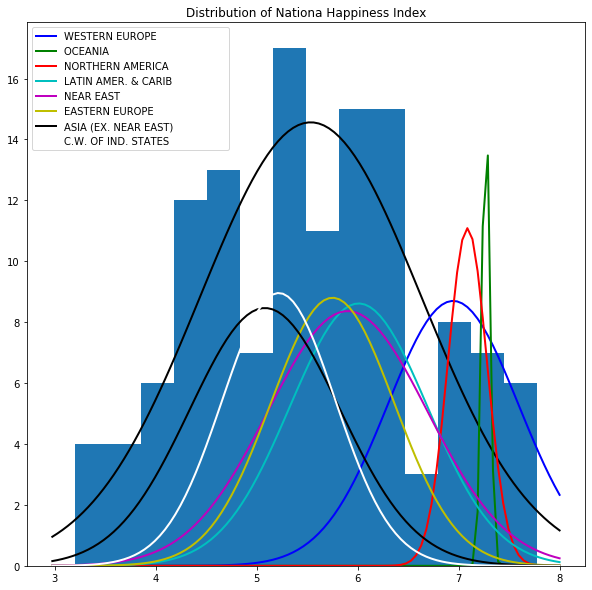

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
plt.hist(happiness_score_overall, bins = 14)
mu,std = norm.fit(happiness_score_overall)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)*40
plt.plot(x, p, 'k', linewidth=2)


colors = ['b','g','r','c','m','y','k','w']
plt_list = []
for i in range(8):
    mu,std = norm.fit(happiness_list[i].astype(float))
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)*(std**.8)*20
    plt.plot(x, p, colors[i], linewidth=2, label = region_list[i])
    

plt.title('Distribution of Nationa Happiness Index')
plt.legend()
    



Text(0.5, 1.0, 'coastline ratio distribution')

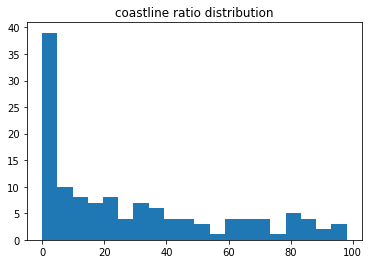

In [12]:
coastline = combined_data['Coastline']
area_coastline = []
for i in coastline:
    a = i.split(',')
    area_coastline.append(int(a[1]))
plt.hist(area_coastline, bins = 20)
#less than 9.8, more than 19.6
plt.title('coastline ratio distribution')

In [13]:
combined_data["area_coastline"] = area_coastline
combined_data['area_coastline']

0      37
1      97
2      77
3      83
4       9
       ..
123    38
124     0
125     0
126     0
127     0
Name: area_coastline, Length: 128, dtype: int64

In [14]:
combined_data['area_coastline'].median()

20.0

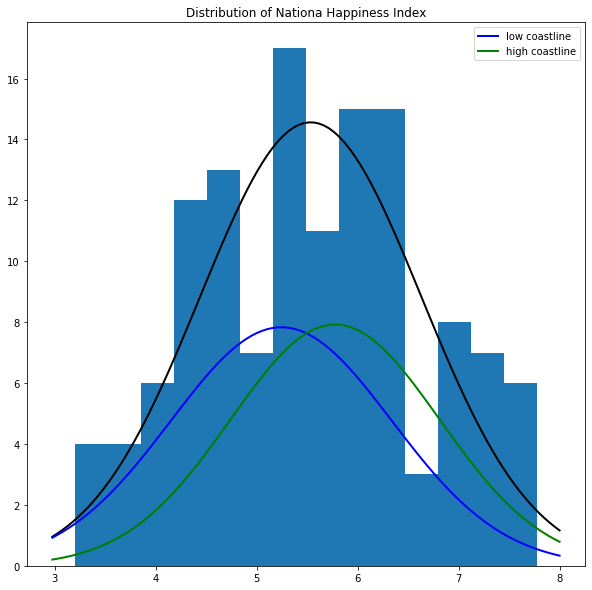

In [16]:
happiness_lowcoastline = combined_data[combined_data['area_coastline'] <= 15.0]['Score']
happiness_highcoastline = combined_data[combined_data['area_coastline'] > 15.0]['Score']
plt.figure(figsize=(10,10))
plt.hist(happiness_score_overall, bins = 14)
mu,std = norm.fit(happiness_score_overall)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)*40
plt.plot(x, p, 'k', linewidth=2)


colors = ['b','g','r','c','m','y','k','w']

mu,std = norm.fit(happiness_lowcoastline.astype(float))
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)*(std**.8)*20
plt.plot(x, p, colors[0], linewidth=2, label = 'low coastline')

mu,std = norm.fit(happiness_highcoastline.astype(float))
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)*(std**.8)*20
plt.plot(x, p, colors[1], linewidth=2, label = 'high coastline')    

plt.title('Distribution of Nationa Happiness Index')
plt.legend()
    

C:\Users\gy\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gy\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([12., 17., 20., 18., 18., 17., 13.,  5.,  0.,  1.,  0.,  1.,  0.,
         1.]),
 array([ 1.65821667,  2.34822569,  3.03823471,  3.72824373,  4.41825275,
         5.10826177,  5.7982708 ,  6.48827982,  7.17828884,  7.86829786,
         8.55830688,  9.24831591,  9.93832493, 10.62833395, 11.31834297]),
 <a list of 14 Patch objects>)

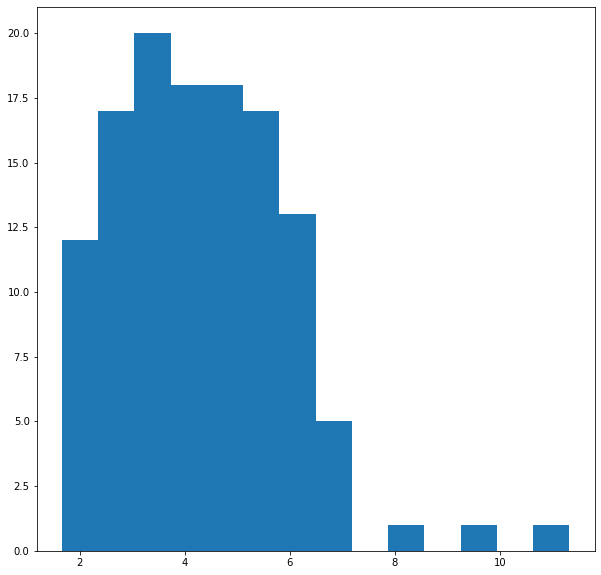

In [17]:
investment = combined_data['average2002-2012']

plt.figure(figsize=(10,10))
plt.hist(investment, bins = 14)


In [18]:
combined_data['average2002-2012'].median()

4.19777494675

In [19]:
print(combined_data[combined_data['Country or region'] == 'China'])

   Overall rank Country or region  Score GDP per capita Social support  \
80           93             China  5.191          1.029          1.125   

   Healthy life expectancy Freedom to make life choices Generosity  \
80                   0.893                        0.521      0.058   

   Perceptions of corruption Country Name  ... Crops  Other Climate Birthrate  \
80                     0.100        China  ...  1,25  83,35     1,5     13,25   

   Deathrate Agriculture Industry Service average2002-2012 area_coastline  
80      6,97       0,125    0,473   0,403          1.86192             15  

[1 rows x 96 columns]


In [20]:
historical_age = pd.read_csv('Data\\MedianAge.csv')
current_age = pd.read_csv('Data\\population_by_country_2020.csv')
combined_age = historical_age.merge(current_age, left_on ='Country', right_on='Country (or dependency)')
cond1 = combined_age['Med. Age'].astype(float) >= 38
cond2 = (combined_age['Med. Age'].astype(float) - combined_age['1990'].astype(float)) > 6.5
aged = combined_age[cond1 & cond2]
combined_age["aged"] = cond1&cond2
print(combined_age)
warlist = ['Afghanistan', 'United States of America', 'Iran', 'Iraq', 'Pakistan', 'Central African Republic', 'Chad', 'Nigeria', 'Yemen', 'Israel', 'Libya', 'Russia', 'Ukraine', '']
combined_age['war'] = combined_age['Country'].isin(warlist)
#combined_age['aged' == True]['Country']
#combined_age[aging]['Country']

            Country    1950    1955    1960    1965    1970    1975    1980  \
0       Afghanistan  18.597  18.462  18.311  18.193  17.994  17.648  17.357   
1           Albania  20.640  20.202  19.677  18.955  18.844  19.490  21.349   
2           Algeria  19.927  19.307  18.170  16.742  15.808  16.165  16.910   
3            Angola  19.401  18.882  18.244  17.481  16.987  16.828  16.652   
4         Argentina  25.657  26.471  27.070  27.398  27.593  27.663  27.377   
..              ...     ...     ...     ...     ...     ...     ...     ...   
170       Venezuela  18.333  17.745  17.245  16.789  17.072  18.096  19.068   
171         Vietnam  24.625  23.740  22.169  19.396  18.027  18.209  18.184   
172  Western Sahara  18.665  19.999  20.799  21.072  20.237  16.811  21.313   
173          Zambia  17.474  17.558  17.478  17.279  16.814  16.482  16.281   
174        Zimbabwe  18.968  18.160  17.381  16.265  15.883  15.735  15.494   

       1985    1990  ...  Yearly Change  Net Change

In [21]:
combined_data = combined_data.merge(combined_age, left_on = 'Country or region', right_on = 'Country')

In [22]:
print(combined_data[combined_data['Country or region'] == 'United States of America'])
print(combined_data['aged'])

   Overall rank         Country or region  Score GDP per capita  \
18           19  United States of America  6.892          1.433   

   Social support Healthy life expectancy Freedom to make life choices  \
18          1.457                   0.874                        0.454   

   Generosity Perceptions of corruption              Country Name  ...  \
18      0.280                     0.128  United States of America  ...   

   Net Change Density (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate  \
18    1937734              36         9147420       954806.0        1.8   

   Med. Age Urban Pop % World Share   aged   war  
18       38        83 %      4.25 %  False  True  

[1 rows x 131 columns]
0       True
1      False
2      False
3      False
4       True
       ...  
121    False
122    False
123    False
124    False
125    False
Name: aged, Length: 126, dtype: bool


In [23]:
median_education = combined_data['average2002-2012'].median()
upper_half = combined_data['average2002-2012'] > median_education
lower_half = combined_data['average2002-2012'] < median_education
e_score_upper_half = combined_data[upper_half]['Score'].astype(float).mean()
e_score_lower_half = combined_data[lower_half]['Score'].astype(float).mean()
print(e_score_upper_half)
print(e_score_lower_half)

5.90696666666667
5.140966666666668


In [24]:
def standarization(data, y_col, a_col, c1_col, c2_col = None, c3_col = None):
    median_education = combined_data['average2002-2012'].median()
    total_n = data.shape[0]
    unique_c1 = data[c1_col].unique()
    if c2_col != None:
        unique_c2 = data[c2_col].unique()
    else:
        unique_c2 = ['NA']
    if c3_col != None:
        unique_c3 = data[c3_col].unique()
    else:
        unique_c3 = ['NA']
    data_bins = []
    prob_bins = []
    for c1 in unique_c1:
        subdata = data[data[c1_col] == c1]
        for c2 in unique_c2:
            if c2_col != None:
                subdata = subdata[data[c2_col] == c2]
            for c3 in unique_c3:
                if c3_col != None:
                    subdata = data[data[c3_col] == c3]
                sample_n = subdata.shape[0]
                if subdata.shape[0] == 0:
                    continue
                data_bins.append(subdata)
                prob_bins.append(sample_n/total_n)
    e_score_upper_half = 0.0
    e_score_lower_half = 0.0
    for data,prob in zip(data_bins, prob_bins):
        upper_half = data['average2002-2012'] > median_education
        lower_half = data['average2002-2012'] < median_education
        upper_half_mean = data[upper_half]['Score'].astype(float).mean()
        lower_half_mean = data[lower_half]['Score'].astype(float).mean()
        #print(data[upper_half]['Score'].astype(float).mean())
        #print(data[lower_half]['Score'].astype(float).mean())
        if data[upper_half]['Score'].shape[0] > 0:
            e_score_upper_half += data[upper_half]['Score'].astype(float).mean() * prob
        if data[lower_half]['Score'].shape[0] > 0:
            e_score_lower_half += data[lower_half]['Score'].astype(float).mean() * prob
    print(e_score_upper_half, e_score_lower_half)
standarization(combined_data,'average2002-2012','Score','war')
standarization(combined_data,'average2002-2012','Score','aged')
standarization(combined_data,'average2002-2012','Score','Region')
standarization(combined_data,'average2002-2012','Score','Region','war','aged')
standarization(combined_data,'average2002-2012','Score','Region','war',)
#standarization(combined_data,'average2002-2012','Score','Region')
#standarization(combined_data,'average2002-2012','Score','Region')

5.911794486215542 5.138628826530613
5.825290476190478 5.174046666666666
5.563577040007922 5.024391291797871
128.1563904761906 113.82902666666669


E:\Environments\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


5.1884869245678065 4.580204557479557


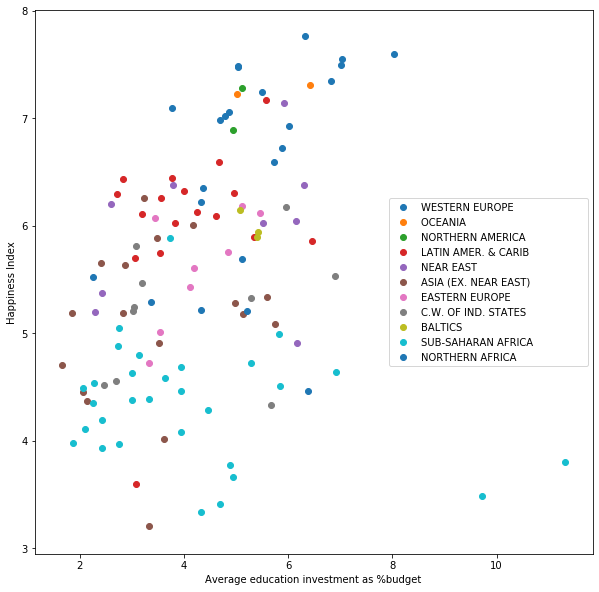

In [25]:
happiness_list = []
edu_list = []
region_list = combined_data['Region'].unique()


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
for region in region_list:
    happiness_index = combined_data[combined_data['Region']==region]['Score']
    happiness_list.append(happiness_index)
    edu = combined_data[combined_data['Region']==region]['average2002-2012']
    ax1.scatter(edu.astype(float), happiness_index.astype(float), label = region)
plt.xlabel("Average education investment as %budget")
plt.ylabel("Happiness Index")
axes = plt.gca()
plt.legend()

No handles with labels found to put in legend.


Text(0, 0.5, 'Happiness Index')

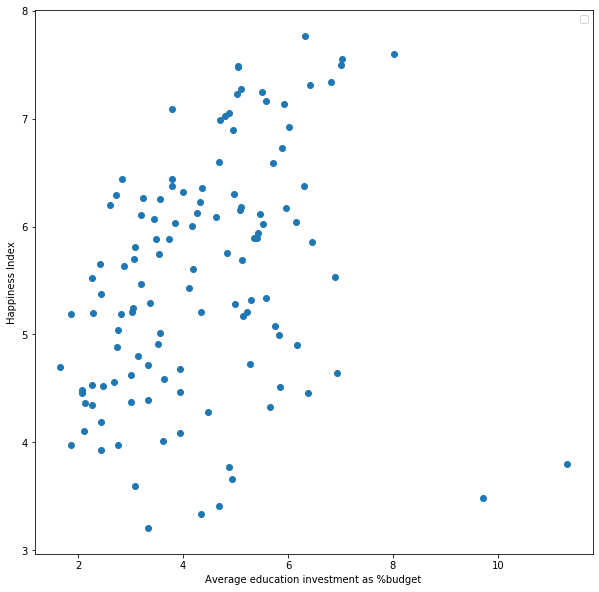

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(combined_data['average2002-2012'].astype(float), combined_data['Score'].astype(float))

axes = plt.gca()
plt.legend()
plt.xlabel("Average education investment as %budget")
plt.ylabel("Happiness Index")

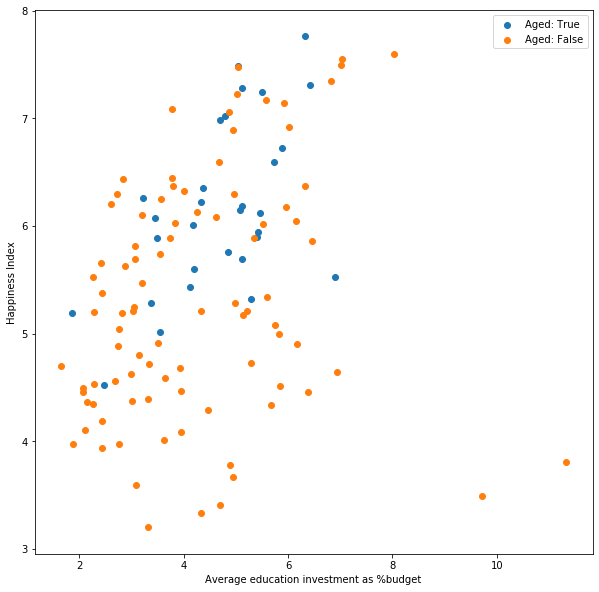

In [27]:
happiness_list = []
edu_list = []
region_list = combined_data['aged'].unique()
plt.figure(figsize=(10,10))
for region in region_list:
    happiness_index = combined_data[combined_data['aged']==region]['Score']
    happiness_list.append(happiness_index)
    edu = combined_data[combined_data['aged']==region]['average2002-2012']
    plt.scatter(edu.astype(float), happiness_index.astype(float), label = 'Aged: {}'.format(region))

plt.xlabel("Average education investment as %budget")
plt.ylabel("Happiness Index")
axes = plt.gca()
plt.legend()

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

E:\Environments\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
E:\Environments\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
E:\Environments\lib\site-packages\sklearn\model_selection\_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


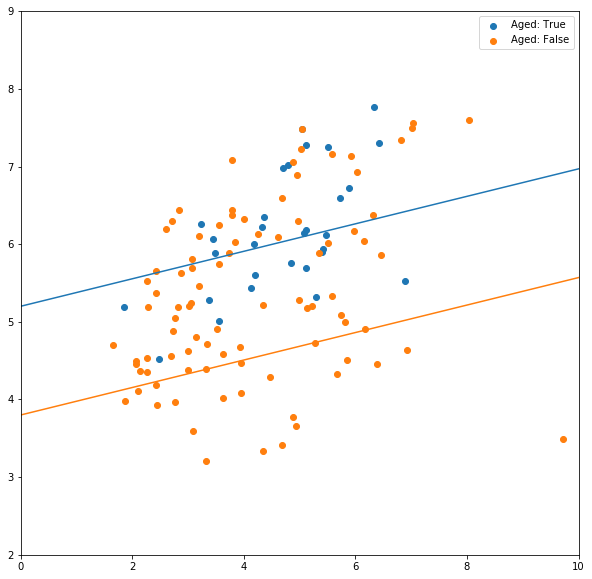

In [34]:
aged_10 = combined_data['aged'].astype(int).astype(float)
edu = combined_data['average2002-2012'].astype(float)
y = combined_data['Score'].astype(float)
x = pd.merge(edu, aged_10, on=edu.index, how='outer')
x = x.to_numpy()[:,1:]
y = y.to_numpy()
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]
reg = LinearRegression().fit(x, y)
reg.coef_
co = reg.coef_
happiness_list = []
edu_list = []
region_list = combined_data['aged'].unique()
plt.figure(figsize=(10,10))
for region in region_list:
    happiness_index = combined_data[combined_data['aged']==region]['Score']
    happiness_list.append(happiness_index)
    edu = combined_data[combined_data['aged']==region]['average2002-2012']
    plt.scatter(edu.astype(float), happiness_index.astype(float), label = 'Aged: {}'.format(region))
fitting_results = [[.177,5.2],[.177, 3.8]]
x1, y1 = [-1, 20], [-1*fitting_results[0][0] + fitting_results[0][1], 20*fitting_results[0][0] + fitting_results[0][1]]
x2, y2 = [-1, 20], [-1*fitting_results[1][0] + fitting_results[1][1], 20*fitting_results[1][0] + fitting_results[1][1]]

plt.xlim(0, 10), plt.ylim(2, 9)
plt.plot(x1, y1, x2, y2, marker = 'o')

axes = plt.gca()
plt.legend()

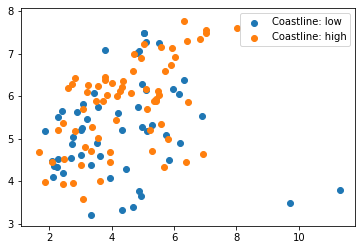

In [35]:
lowcoastline = combined_data[combined_data['area_coastline'] <= 15.0]
highcoastline = combined_data[combined_data['area_coastline'] > 15.0]
happi_l = lowcoastline['Score']
happi_h = highcoastline['Score']
edu_l = lowcoastline['average2002-2012']
edu_h = highcoastline['average2002-2012']
plt.scatter(edu_l.astype(float), happi_l.astype(float), label = 'Coastline: low')
plt.scatter(edu_h.astype(float), happi_h.astype(float), label = 'Coastline: high')
plt.legend()

In [59]:
#IPweighting Linear Regression

In [65]:
combined_data['coast_10'] = (combined_data['area_coastline'] <= 15.0).astype(float)
combined_data['aged_10'] = (combined_data['aged']).astype(float)
x = combined_data[['coast_10', 'aged_10', 'GDP per capita']]
edu = combined_data['average2002-2012'].astype(float)
med = edu.median()
edu_boolean = edu > med
edu_10 = edu_boolean.astype(float).to_numpy()
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x, edu_10)
p_score = clf.predict_proba(x)[:,0]
p_score.shape
#combined_data
combined_data['edi_bool'] = edu_boolean
combined_data['p_score'] = p_score
combined_data_upper = combined_data[combined_data['edi_bool'] == True]
combined_data_lower = combined_data[combined_data['edi_bool'] == False]
x1 = combined_data_upper.shape[0]
x2 = combined_data_lower.shape[0]
dic = {}
fitting_results = [[.73, 4.6],[.78, 4.67],[.55, 2.7],[.52, 2.55]]

#print(combined_data_lower['Country or region'][13])
'''
for i in range(x1):
    row = combined_data_upper.iloc[[i]]
    country_name = combined_data_upper.iloc[[i]]['Country Name'].item()
    p_score_i = combined_data_upper.iloc[[i]]['p_score'].item()
    new_dict = {}
    for j in range(x2):
        row_j = combined_data_lower.iloc[[j]]
        country_name2 = combined_data_lower.iloc[[j]]['Country Name'].item()
        p_score_j = combined_data_lower.iloc[[j]]['p_score'].item()
        diff = int(abs(p_score_i - p_score_j)*1000)
        #print(country_name2)
        new_dict[country_name2] = diff
    dic[country_name] = new_dict
'''
matrix = np.ones((x1,x2))
for i in range(x1):
    row = combined_data_upper.iloc[[i]]
    country_name = combined_data_upper.iloc[[i]]['Country Name'].item()
    p_score_i = combined_data_upper.iloc[[i]]['p_score'].item()
    for j in range(x2):
        row_j = combined_data_lower.iloc[[j]]
        country_name2 = combined_data_lower.iloc[[j]]['Country Name'].item()
        p_score_j = combined_data_lower.iloc[[j]]['p_score'].item()
        diff = int(abs(p_score_i - p_score_j)*1000)
        #print(country_name2)
        matrix[i][j] = diff
import scipy
ans = scipy.optimize.linear_sum_assignment(matrix)
print(ans)

E:\Environments\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: `item` has been deprecated and will be removed in a future version
E:\Environments\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: `item` has been deprecated and will be removed in a future version
E:\Environments\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: `item` has been deprecated and will be removed in a future version
E:\Environments\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: `item` has been deprecated and will be removed in a future version


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64), array([59, 47, 35, 53,  1, 56, 38, 45, 48, 30, 24, 19,  6, 10,  7, 16, 17,
        8, 36, 46, 12,  9, 52, 15,  2, 34, 11,  5, 26, 40, 55,  3, 14,  4,
       58, 41,  0, 28, 32, 31, 23, 39, 33, 60, 21, 18, 37, 20, 22, 29, 25,
       13, 49, 57, 51, 50, 65, 27, 64, 42], dtype=int64))


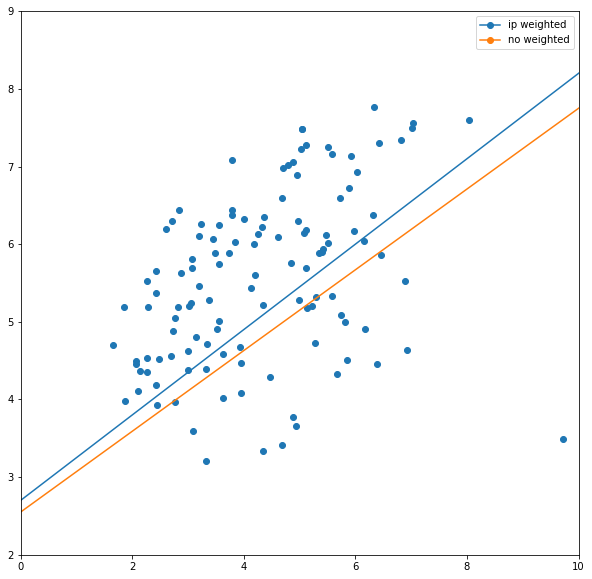

In [66]:
aged_10 = combined_data['aged'].astype(int).astype(float)
edu = combined_data['average2002-2012'].astype(float)
y = combined_data['Score'].astype(float)
x = pd.merge(edu, aged_10, on=edu.index, how='outer')
x = x.to_numpy()
x_new = np.ones(x.shape)
x_new[:,1:] = x[:,1:]
y = y.to_numpy()
y = y[~np.isnan(x).any(axis=1)]
x = x[~np.isnan(x).any(axis=1)]
x = x[:,0:2]
reg = LinearRegression().fit(x, y)
reg.coef_
co = reg.coef_
happiness_list = []
edu_list = []
region_list = combined_data['aged'].unique()
plt.figure(figsize=(10,10))
plt.scatter(combined_data['average2002-2012'].astype(float), combined_data['Score'].astype(float))

x1, y1 = [-1, 20], [-1*fitting_results[2][0] + fitting_results[2][1], 20*fitting_results[2][0] + fitting_results[2][1]]


plt.xlim(0, 10), plt.ylim(2, 9)
plt.plot(x1, y1, marker = 'o', label = 'ip weighted')
x2, y2 = [-1, 20], [-1*fitting_results[3][0] + fitting_results[3][1], 20*fitting_results[3][0] + fitting_results[3][1]]
plt.plot(x2, y2, marker = 'o', label = 'no weighted')
axes = plt.gca()
plt.legend()

(126, 1)
(126,)
[0.73186061]
0.11079314364483815


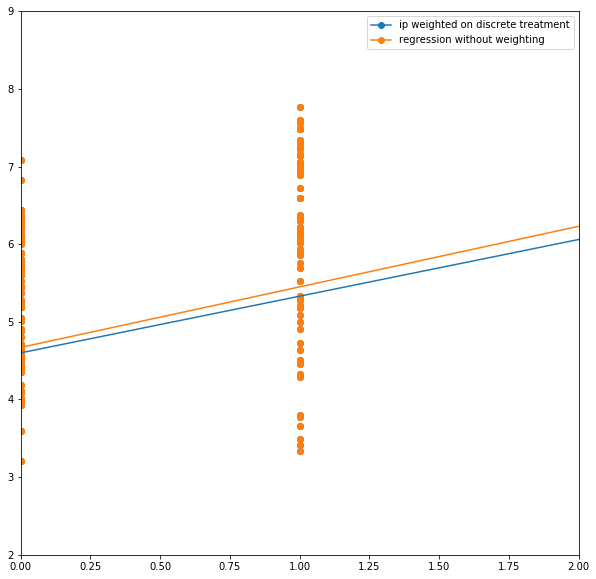

In [39]:
aged_10 = combined_data['aged'].astype(int).astype(float)
edu = combined_data['average2002-2012'].astype(float)
med = edu.median()
edu_boolean = edu > med
edu_10 = edu_boolean.astype(float)
#print(edu_10)
y = combined_data['Score'].astype(float)
x = edu_10

x = np.expand_dims(x, axis=1)
y = y.to_numpy()
print(x.shape)
print(y.shape)
reg = LinearRegression().fit(x,y)
reg.coef_
co = reg.coef_
print(co)
print(reg.score(x,y))
happiness_list = []
edu_list = []
region_list = combined_data['aged'].unique()
plt.figure(figsize=(10,10))
for region in region_list:
    happiness_index = combined_data[combined_data['aged']==region]['Score']
    happiness_list.append(happiness_index)
    edu = combined_data[combined_data['aged']==region]['average2002-2012']
    plt.scatter(edu_10, y)

x1, y1 = [-1, 20], [-1*fitting_results[0][0] + fitting_results[0][1] , 20*fitting_results[0][0] + fitting_results[0][1]]

plt.xlim(0, 2), plt.ylim(2, 9)
plt.plot(x1, y1, marker = 'o', label = 'ip weighted on discrete treatment')
x2, y2 = [-1, 20], [-1*fitting_results[1][0] + fitting_results[1][1] , 20*fitting_results[1][0] + fitting_results[1][1]]
plt.plot(x2, y2, marker = 'o', label = 'regression without weighting')

axes = plt.gca()
plt.legend()

In [63]:
def bootstrap_sampling(dataframe):
    df_length = dataframe.shape[0]
    #sampling n integers in range(0,n):
    samples = dataframe.iloc[np.random.randint(df_length, size=df_length)]
    return samples
coe_list = []
for i in range(1000):
    samples = bootstrap_sampling(combined_data)
    aged_10 = samples['aged'].astype(int).astype(float)
    edu = samples['average2002-2012'].astype(float)
    edu_boolean = edu > med
    edu_10 = edu_boolean.astype(float)
    y = samples['Score'].astype(float)
    x = edu_10
    x = np.expand_dims(x, axis=1)
    y = y.to_numpy()
    reg = LinearRegression().fit(x,y)
    reg.coef_
    co = reg.coef_
    coe_list.append(co[0])
coe_list = sorted(coe_list)
print("bootstraped confidence percentiles 5% {}, 50% {}, 95%  {}".format(coe_list[50], coe_list[500], coe_list[950]))


bootstraped confidence percentiles 5% 0.38100655737704914, 50% 0.7209618611746761, 95%  1.0597682772577788


In [58]:
#propensity matching

In [490]:
pairs = []
top = ans[0]
bot = ans[1]
for (ida,idb) in zip(top, bot):
    country_a = combined_data_upper.iloc[[ida]]['Country Name'].item()
    country_b = combined_data_lower.iloc[[idb]]['Country Name'].item()
    p_score_i = combined_data_upper.iloc[[ida]]['p_score'].item()
    p_score_j = combined_data_lower.iloc[[idb]]['p_score'].item()
    dist =  int(abs(p_score_i - p_score_j)*1000)
    t = (country_a, country_b, dist)
    pairs.append(t)
pairs = sorted(pairs, key=lambda tup: tup[2])
print(pairs)    

[('Ethiopia', 'Uganda', 0), ('Botswana', 'Turkey', 0), ('South Africa', 'Philippines', 1), ('Tunisia', 'Ecuador', 2), ('Burundi', 'Mozambique', 2), ('France', 'Romania', 3), ('Estonia', 'Qatar', 3), ('Zimbabwe', 'Afghanistan', 3), ('Malawi', 'Haiti', 3), ('Ghana', 'Nepal', 4), ('Kenya', 'Tajikistan', 4), ('Jordan', 'Peru', 5), ('Brazil', 'Mauritius', 7), ('Poland', 'China', 7), ('Costa Rica', 'Paraguay', 8), ('Malaysia', 'Azerbaijan', 8), ('Belgium', 'Kazakhstan', 9), ('Portugal', 'Greece', 9), ('Mongolia', 'Gabon', 9), ('Bhutan', 'Bolivia', 9), ('Namibia', 'Nigeria', 9), ('Germany', 'Japan', 10), ('Morocco', 'India', 11), ('Hungary', 'Luxembourg', 12), ('Rwanda', 'Senegal', 12), ('Ireland', 'Singapore', 15), ('Belarus', 'Serbia', 15), ('Honduras', 'Cambodia', 16), ('Vietnam', 'Pakistan', 16), ('Lesotho', 'Bangladesh', 17), ('Mexico', 'Armenia', 19), ('Slovenia', 'Croatia', 25), ('Ukraine', 'Mauritania', 26), ('Jamaica', 'Zambia', 27), ('Latvia', 'Thailand', 34), ('Argentina', 'Albania

E:\Environments\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
E:\Environments\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
E:\Environments\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
E:\Environments\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  


E:\Environments\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  
E:\Environments\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':


Text(0, 0.5, 'E(Y|A = 1)/E(Y|A = 0)')

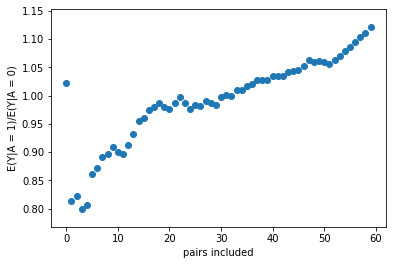

In [527]:
results = []
current_top = 0
current_bot = 0
for pair in pairs:
    (country_a, country_b, dist) = pair
    a_data = combined_data_upper[combined_data_upper['Country Name'] == country_a]
    b_data = combined_data_lower[combined_data_lower['Country Name'] == country_b]
    a_y = a_data['Score'].item()
    b_y = b_data['Score'].item()
    current_top += float(a_y)
    current_bot += float(b_y)
    results.append(current_top/current_bot)
x = list(range(len(results)))
plt.scatter(x,results)
plt.xlabel('pairs included')
plt.ylabel('E(Y|A = 1)/E(Y|A = 0)')